Mean Squared Error (MSE): 2347810165.80
R2 Score: 0.64


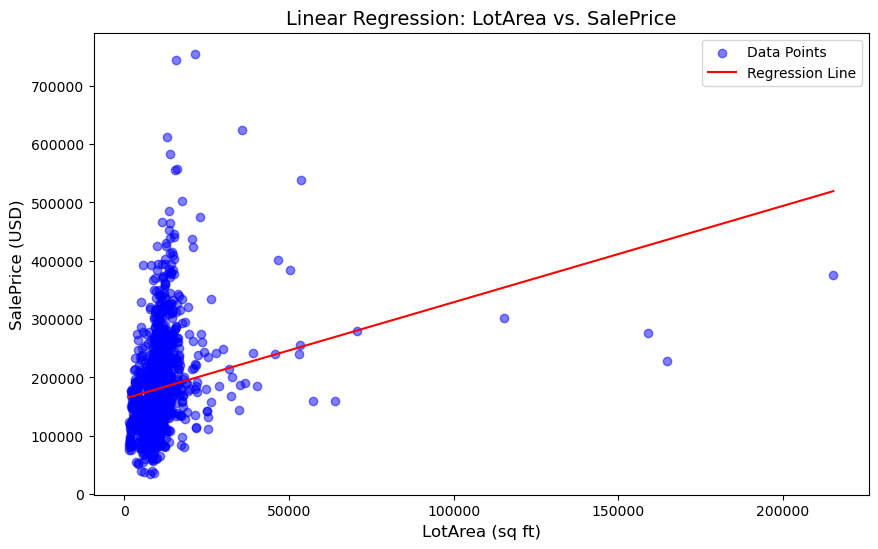

Predicted price for house with 2500 sq ft and quality 6: $163492.70


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the training and testing datasets
train_data = pd.read_csv('tr.csv')  # Replace with the path to your train.csv file
test_data = pd.read_csv('tst.csv')    # Replace with the path to your test.csv file

# Select relevant features and target
features = ['LotArea', 'OverallQual']  # Features: Area and Quality
target = 'SalePrice'                   # Target: Sale Price

# Drop rows with missing values in the relevant columns
train_data_cleaned = train_data.dropna(subset=features + [target])

# Define features (X) and target (y) for training
X = train_data_cleaned[features]
y = train_data_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train.values, y_train)

# Ensure X_test has the same feature names as X_train
X_test = pd.DataFrame(X_test, columns=features)

# Predict on the test data
y_pred = model.predict(X_test.values)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Visualization: Scatter plot for 'LotArea' vs. 'SalePrice' with the regression line
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(train_data_cleaned['LotArea'], train_data_cleaned['SalePrice'], color='blue', alpha=0.5, label='Data Points')

# Regression line
lot_area_range = np.linspace(train_data_cleaned['LotArea'].min(), train_data_cleaned['LotArea'].max(), 500).reshape(-1, 1)
regression_line = model.predict(np.hstack([lot_area_range, np.full_like(lot_area_range, train_data_cleaned['OverallQual'].mean())]))

plt.plot(lot_area_range, regression_line, color='red', label='Regression Line')

# Labels and title
plt.xlabel('LotArea (sq ft)', fontsize=12)
plt.ylabel('SalePrice (USD)', fontsize=12)
plt.title('Linear Regression: LotArea vs. SalePrice', fontsize=14)
plt.legend()
plt.show()

# Predicting house price for new data with correct feature names
new_data = pd.DataFrame({'LotArea': [2500], 'OverallQual': [6]})
new_data = new_data[features]  # Ensure the same features as the training data

# Predict with the correct feature names
predicted_price = model.predict(new_data.values)
print(f"Predicted price for house with {new_data['LotArea'][0]} sq ft and quality {new_data['OverallQual'][0]}: ${predicted_price[0]:.2f}")
